In [43]:
import pandas as pd

df_claim = pd.read_csv('final-dataset(A1-31306samples)-train-topicmodel.csv')
df_claim.head()

,publication_number,country_code,kind_code,title,abstract,claims,publication_date,ipc_code,cpc_code,first_claim,claim_lengths,sub_classes,sub_class,abstract_lengths
0,US2020097067A1,US,A1,Artificial Intelligence System and Interactive...,"A reality interactive responding system, compr...","1 . A reality interactive responding system, c...",20200326,G06F9/448,G16H40/67,"1 . A reality interactive responding system, c...",200,"['G06F9/448', 'G16H40/67']","['G06F', 'G16H']",123
1,US2020098473A1,US,A1,Data Storage and Retrieval System for Non-Cont...,A web-based interface enables medical personne...,What is claimed is: \n \n 1 . A da...,20200326,G16H40/67,H04L67/1097,What is claimed is: 1 . A data storage and ret...,200,"['G16H40/67', 'H04L67/1097']","['G16H', 'H04L']",142
2,US2020098451A1,US,A1,Hybrid analysis framework for prediction of ou...,A facility for predicting patient outcomes on ...,"1 . A method in a computing system, comprising...",20200326,G16H10/20,G16H10/20,"1 . A method in a computing system, comprising...",200,"['G16H10/20', 'G16H10/20']","['G16H', 'G16H']",81
3,US2020098458A1,US,A1,Medical cannabis platform with physician and p...,"Through a physician&#39;s portal, a platform c...",What is claimed is: \n \n 1 . A me...,20200326,G16H80/00,A61K36/185,What is claimed is: 1 . A method for providing...,200,"['G16H80/00', 'A61K36/185']","['G16H', 'A61K']",148
4,US2020093988A1,US,A1,Patient day planning systems and methods,"Infusion systems, infusion devices, and relate...",What is claimed is: \n \n 1 . A me...,20200326,G16H20/17,A61M2230/201,What is claimed is: 1 . A method of monitoring...,200,"['G16H20/17', 'A61M2230/201']","['G16H', 'A61M']",110


In [44]:
len(df_claim)

31306

# preprocessing

In [45]:
def cleantext(df_claim): 
    
    df_claim['cleaned_claim_text'] = df_claim['first_claim'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    df_claim['cleaned_claim_text'] = df_claim['cleaned_claim_text'].str.lower()
    
    #remove numbers
    df_claim['cleaned_claim_text'] =df_claim['cleaned_claim_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    df_claim['cleaned_claim_text']  = df_claim['cleaned_claim_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_claim['cleaned_claim_text'] = df_claim['cleaned_claim_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_claim['cleaned_claim_text']  = df_claim['cleaned_claim_text'].replace(r'https.*$', "", regex = True)
    df_claim['cleaned_claim_text'] = df_claim['cleaned_claim_text'].replace("   ", " ", regex = True)
    df_claim['cleaned_claim_text'] = df_claim['cleaned_claim_text'].replace("  ", " ", regex = True)
   
    return df_claim

df_claim = cleantext(df_claim)
df_claim.head()

,publication_number,country_code,kind_code,title,abstract,claims,publication_date,ipc_code,cpc_code,first_claim,claim_lengths,sub_classes,sub_class,abstract_lengths,cleaned_claim_text
0,US2020097067A1,US,A1,Artificial Intelligence System and Interactive...,"A reality interactive responding system, compr...","1 . A reality interactive responding system, c...",20200326,G06F9/448,G16H40/67,"1 . A reality interactive responding system, c...",200,"['G06F9/448', 'G16H40/67']","['G06F', 'G16H']",123,a reality interactive responding system compr...
1,US2020098473A1,US,A1,Data Storage and Retrieval System for Non-Cont...,A web-based interface enables medical personne...,What is claimed is: \n \n 1 . A da...,20200326,G16H40/67,H04L67/1097,What is claimed is: 1 . A data storage and ret...,200,"['G16H40/67', 'H04L67/1097']","['G16H', 'H04L']",142,what is claimed is a data storage and retrieva...
2,US2020098451A1,US,A1,Hybrid analysis framework for prediction of ou...,A facility for predicting patient outcomes on ...,"1 . A method in a computing system, comprising...",20200326,G16H10/20,G16H10/20,"1 . A method in a computing system, comprising...",200,"['G16H10/20', 'G16H10/20']","['G16H', 'G16H']",81,a method in a computing system comprising obt...
3,US2020098458A1,US,A1,Medical cannabis platform with physician and p...,"Through a physician&#39;s portal, a platform c...",What is claimed is: \n \n 1 . A me...,20200326,G16H80/00,A61K36/185,What is claimed is: 1 . A method for providing...,200,"['G16H80/00', 'A61K36/185']","['G16H', 'A61K']",148,what is claimed is a method for providing netw...
4,US2020093988A1,US,A1,Patient day planning systems and methods,"Infusion systems, infusion devices, and relate...",What is claimed is: \n \n 1 . A me...,20200326,G16H20/17,A61M2230/201,What is claimed is: 1 . A method of monitoring...,200,"['G16H20/17', 'A61M2230/201']","['G16H', 'A61M']",110,what is claimed is a method of monitoring a ph...


In [46]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words 337
patent_stop_words = set([
                        'a', 'an', 'the', 'is', 'are', 'was', 'were', 'will', 'shall', 'may', 'can', 'could',
                        'of', 'in', 'on', 'at', 'by', 'with', 'for', 'to', 'from', 'as', 'and', 'or', 'not',
                        'this', 'that', 'these', 'those', 'such', 'which', 'where', 'when', 'who', 'whom',
                        'what', 'how', 'why', 'be', 'have', 'has', 'having', 'had', 'do', 'does', 'doing',
                        'done', 'but', 'however', 'although', 'unless', 'until', 'since', 'while', 'before',
                        'after', 'during', 'through', 'over', 'under', 'above', 'below', 'between', 'among',
                        'within', 'without', 'against', 'via', 'via', 'due', 'onto', 'per', 'each', 'any',
                        'some', 'many', 'few', 'all', 'most', 'no', 'yes', 'ok', 'okk', 'nope', 'nopes', 'nay',
                        'more', 'less', 'least', 'other', 'another', 'somehow', 'thus', 'therefore',
                        'otherwise', 'instead', 'again', 'further', 'furthermore', 'also', 'besides', 'moreover',
                        'hence', 'thus', 'therefore', 'accordingly', 'consequently', 'so', 'then', 'thereby',
                        'otherwise', 'instead', 'again', 'further', 'furthermore', 'also', 'besides', 'moreover',
                        'hence', 'thus', 'therefore', 'accordingly', 'consequently', 'so', 'then', 'thereby',
                        'therein', 'thereupon', 'therewith', 'thereto', 'wherefore', 'forthwith', 'hereby',
                        'herein', 'hereupon', 'herewith', 'hereto', 'whereupon', 'aforesaid', 'heretofore',
                        'herewith', 'hereto', 'whereupon', 'aforesaid', 'heretofore', 'therefrom', 'thereof',
                        'therein', 'thereon', 'thereto', 'whereby', 'thereafter', 'hereafter', 'whenever',
                        'wherever', 'until', 'since', 'whenever', 'wherever', 'until', 'since', 'whereas', 'whilst',
                        'whereas', 'whilst', 'beside', 'beyond', 'during', 'about', 'around', 'above', 'below', 'before',
                        'after', 'without', 'within', 'between', 'among', 'against', 'under', 'over', 'through',
                        'into', 'onto', 'upon', 'am', 'are', 'is', 'was', 'were', 'be', 'been', 'being', 'have', 'has',
                        'had', 'having', 'do', 'does', 'did', 'doing', 'can', 'could', 'will', 'would', 'shall', 'should',
                        'may', 'might', 'must', 'ought', 'need', 'dare', 'used', 'use', 'using', 'uses', 'used', 'put',
                        'puts', 'putting', 'tell', 'tells', 'told', 'telling', 'ask', 'asks', 'asked', 'asking',
                        'make', 'makes', 'made', 'making', 'find', 'finds', 'found', 'finding', 'keep', 'keeps',
                        'kept', 'keeping', 'begin', 'begins', 'began', 'beginning', 'show', 'shows', 'showed',
                        'showing', 'say', 'says', 'said', 'saying', 'says', 'said', 'let', 'lets', 'letting', 'make',
                        'makes', 'made', 'making', 'put', 'puts', 'putting', 'seem', 'seems', 'seemed', 'seeming',
                        'need', 'needs', 'needed', 'needing', 'become', 'becomes', 'became', 'bec'])


# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_claim['cleaned_claim_without_Stopwprd'] = df_claim['cleaned_claim_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_claim.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,publication_number,country_code,kind_code,title,abstract,claims,publication_date,ipc_code,cpc_code,first_claim,claim_lengths,sub_classes,sub_class,abstract_lengths,cleaned_claim_text,cleaned_claim_without_Stopwprd
0,US2020097067A1,US,A1,Artificial Intelligence System and Interactive...,"A reality interactive responding system, compr...","1 . A reality interactive responding system, c...",20200326,G06F9/448,G16H40/67,"1 . A reality interactive responding system, c...",200,"['G06F9/448', 'G16H40/67']","['G06F', 'G16H']",123,a reality interactive responding system compr...,reality interactive responding system comprisi...
1,US2020098473A1,US,A1,Data Storage and Retrieval System for Non-Cont...,A web-based interface enables medical personne...,What is claimed is: \n \n 1 . A da...,20200326,G16H40/67,H04L67/1097,What is claimed is: 1 . A data storage and ret...,200,"['G16H40/67', 'H04L67/1097']","['G16H', 'H04L']",142,what is claimed is a data storage and retrieva...,claimed data storage retrieval system nonconti...
2,US2020098451A1,US,A1,Hybrid analysis framework for prediction of ou...,A facility for predicting patient outcomes on ...,"1 . A method in a computing system, comprising...",20200326,G16H10/20,G16H10/20,"1 . A method in a computing system, comprising...",200,"['G16H10/20', 'G16H10/20']","['G16H', 'G16H']",81,a method in a computing system comprising obt...,method computing system comprising obtaining i...
3,US2020098458A1,US,A1,Medical cannabis platform with physician and p...,"Through a physician&#39;s portal, a platform c...",What is claimed is: \n \n 1 . A me...,20200326,G16H80/00,A61K36/185,What is claimed is: 1 . A method for providing...,200,"['G16H80/00', 'A61K36/185']","['G16H', 'A61K']",148,what is claimed is a method for providing netw...,claimed method providing networking communicat...
4,US2020093988A1,US,A1,Patient day planning systems and methods,"Infusion systems, infusion devices, and relate...",What is claimed is: \n \n 1 . A me...,20200326,G16H20/17,A61M2230/201,What is claimed is: 1 . A method of monitoring...,200,"['G16H20/17', 'A61M2230/201']","['G16H', 'A61M']",110,what is claimed is a method of monitoring a ph...,claimed method monitoring physiological condit...


In [47]:
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df_claim["Lemmatized-Claim"] = df_claim["cleaned_claim_without_Stopwprd"].apply(lambda text: lemmatize_words(text))
df_claim.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,publication_number,country_code,kind_code,title,abstract,claims,publication_date,ipc_code,cpc_code,first_claim,claim_lengths,sub_classes,sub_class,abstract_lengths,cleaned_claim_text,cleaned_claim_without_Stopwprd,Lemmatized-Claim
0,US2020097067A1,US,A1,Artificial Intelligence System and Interactive...,"A reality interactive responding system, compr...","1 . A reality interactive responding system, c...",20200326,G06F9/448,G16H40/67,"1 . A reality interactive responding system, c...",200,"['G06F9/448', 'G16H40/67']","['G06F', 'G16H']",123,a reality interactive responding system compr...,reality interactive responding system comprisi...,reality interactive responding system comprisi...
1,US2020098473A1,US,A1,Data Storage and Retrieval System for Non-Cont...,A web-based interface enables medical personne...,What is claimed is: \n \n 1 . A da...,20200326,G16H40/67,H04L67/1097,What is claimed is: 1 . A data storage and ret...,200,"['G16H40/67', 'H04L67/1097']","['G16H', 'H04L']",142,what is claimed is a data storage and retrieva...,claimed data storage retrieval system nonconti...,claimed data storage retrieval system nonconti...
2,US2020098451A1,US,A1,Hybrid analysis framework for prediction of ou...,A facility for predicting patient outcomes on ...,"1 . A method in a computing system, comprising...",20200326,G16H10/20,G16H10/20,"1 . A method in a computing system, comprising...",200,"['G16H10/20', 'G16H10/20']","['G16H', 'G16H']",81,a method in a computing system comprising obt...,method computing system comprising obtaining i...,method computing system comprising obtaining i...
3,US2020098458A1,US,A1,Medical cannabis platform with physician and p...,"Through a physician&#39;s portal, a platform c...",What is claimed is: \n \n 1 . A me...,20200326,G16H80/00,A61K36/185,What is claimed is: 1 . A method for providing...,200,"['G16H80/00', 'A61K36/185']","['G16H', 'A61K']",148,what is claimed is a method for providing netw...,claimed method providing networking communicat...,claimed method providing networking communicat...
4,US2020093988A1,US,A1,Patient day planning systems and methods,"Infusion systems, infusion devices, and relate...",What is claimed is: \n \n 1 . A me...,20200326,G16H20/17,A61M2230/201,What is claimed is: 1 . A method of monitoring...,200,"['G16H20/17', 'A61M2230/201']","['G16H', 'A61M']",110,what is claimed is a method of monitoring a ph...,claimed method monitoring physiological condit...,claimed method monitoring physiological condit...


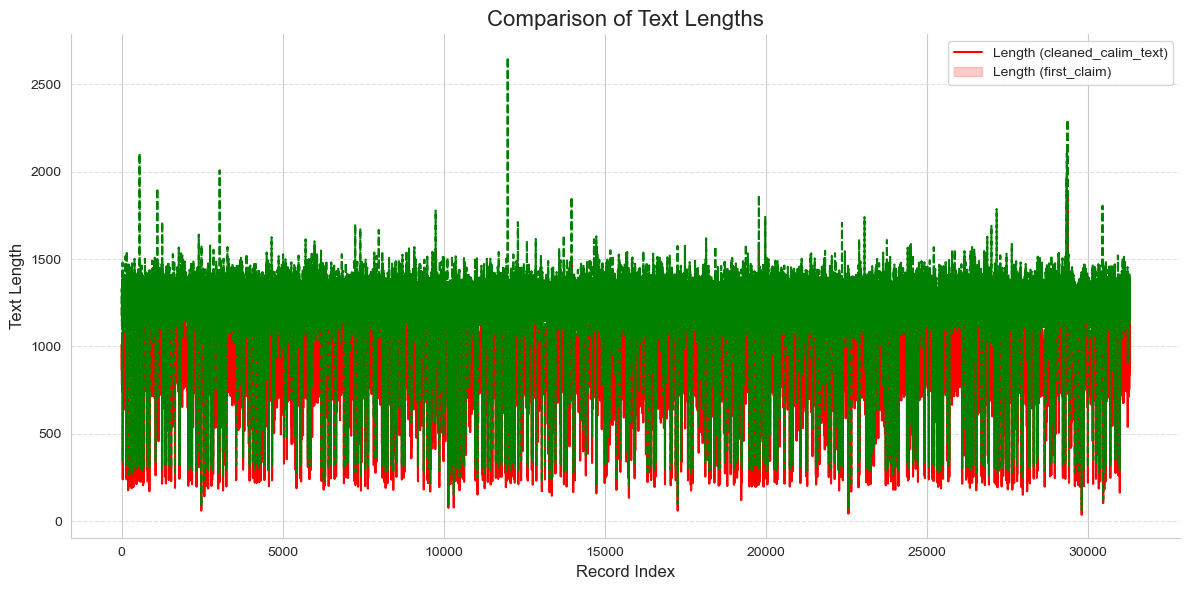

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the length of each record in both columns
df_claim['Length (cleaned)'] = df_claim['Lemmatized-Claim'].str.len()
df_claim['Length (original)'] = df_claim['first_claim'].str.len()

# Set a custom Seaborn style for a more appealing plot
sns.set_style("whitegrid")

# Create a figure with subplots for better readability
fig, ax = plt.subplots(figsize=(12, 6))

# Create line plots for both text lengths
sns.lineplot(data=df_claim[['Length (cleaned)', 'Length (original)']], ax=ax, palette=["red", "green"])
ax.set_xlabel('Record Index', fontsize=12)
ax.set_ylabel('Text Length', fontsize=12)
ax.set_title('Comparison of Text Lengths', fontsize=16)

# Customize the legend
ax.legend(['Length (cleaned_calim_text)', 'Length (first_claim)'], fontsize=10)

# Add a grid to the plot
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

In [49]:
df_claim.head()

,publication_number,country_code,kind_code,title,abstract,claims,publication_date,ipc_code,cpc_code,first_claim,claim_lengths,sub_classes,sub_class,abstract_lengths,cleaned_claim_text,cleaned_claim_without_Stopwprd,Lemmatized-Claim,Length (cleaned),Length (original)
0,US2020097067A1,US,A1,Artificial Intelligence System and Interactive...,"A reality interactive responding system, compr...","1 . A reality interactive responding system, c...",20200326,G06F9/448,G16H40/67,"1 . A reality interactive responding system, c...",200,"['G06F9/448', 'G16H40/67']","['G06F', 'G16H']",123,a reality interactive responding system compr...,reality interactive responding system comprisi...,reality interactive responding system comprisi...,865,1179
1,US2020098473A1,US,A1,Data Storage and Retrieval System for Non-Cont...,A web-based interface enables medical personne...,What is claimed is: \n \n 1 . A da...,20200326,G16H40/67,H04L67/1097,What is claimed is: 1 . A data storage and ret...,200,"['G16H40/67', 'H04L67/1097']","['G16H', 'H04L']",142,what is claimed is a data storage and retrieva...,claimed data storage retrieval system nonconti...,claimed data storage retrieval system nonconti...,1012,1331
2,US2020098451A1,US,A1,Hybrid analysis framework for prediction of ou...,A facility for predicting patient outcomes on ...,"1 . A method in a computing system, comprising...",20200326,G16H10/20,G16H10/20,"1 . A method in a computing system, comprising...",200,"['G16H10/20', 'G16H10/20']","['G16H', 'G16H']",81,a method in a computing system comprising obt...,method computing system comprising obtaining i...,method computing system comprising obtaining i...,1003,1279
3,US2020098458A1,US,A1,Medical cannabis platform with physician and p...,"Through a physician&#39;s portal, a platform c...",What is claimed is: \n \n 1 . A me...,20200326,G16H80/00,A61K36/185,What is claimed is: 1 . A method for providing...,200,"['G16H80/00', 'A61K36/185']","['G16H', 'A61K']",148,what is claimed is a method for providing netw...,claimed method providing networking communicat...,claimed method providing networking communicat...,910,1260
4,US2020093988A1,US,A1,Patient day planning systems and methods,"Infusion systems, infusion devices, and relate...",What is claimed is: \n \n 1 . A me...,20200326,G16H20/17,A61M2230/201,What is claimed is: 1 . A method of monitoring...,200,"['G16H20/17', 'A61M2230/201']","['G16H', 'A61M']",110,what is claimed is a method of monitoring a ph...,claimed method monitoring physiological condit...,claimed method monitoring physiological condit...,951,1240


In [50]:
first_record = df_claim['Lemmatized-Claim'][1]
first_record

'claimed data storage retrieval system noncontiguous medical device data system comprising medical device connectable computer network subject occasional gap connectivity computer network configured automatically repeatedly capture status information medical device send message containing status information computer network network connectivity log configured automatically record time medical device connects computer network b time medical device disconnect computer network data store configured automatically store digital medium data medium file provide requested portion stored medium file response provision request wherein provision request includes index relative end medium file corresponds requested portion medium server connectable computer network configured automatically receive message computer network store status information received message data store wherein status information consecutive received message stored contiguously data store notwithstanding occasional gap connect

In [51]:
x = len(df_claim['Lemmatized-Claim'][1])
print(x)

1012


In [52]:
# Check for NaN or null values in 'Lemmatized-Claim' column
has_nan_or_null = df_claim['Lemmatized-Claim'].isna().any()

if has_nan_or_null:
    print("The 'Lemmatized-Claim' column contains NaN or null values.")
else:
    print("The 'Lemmatized-Claim' column does not contain NaN or null values.")


The 'Lemmatized-Claim' column does not contain NaN or null values.


In [53]:
# Calculate the length of strings in the 'Lemmatized-Claim' column and find the minimum length
min_length = df_claim['Lemmatized-Claim'].str.len().min()

print(f"The shortest length in the 'Lemmatized-Claim' column is: {min_length}")

The shortest length in the 'Lemmatized-Claim' column is: 37


In [54]:
import torch
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from transformers.pipelines import pipeline
from sentence_transformers import SentenceTransformer

# Load the Sentence Transformers model
#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2", device=device)
sentence_model = SentenceTransformer("xlm-r-bert-base-nli-stsb-mean-tokens")

# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=3, 
                  n_components=3, 
                  min_dist=0.05, 
                  metric='cosine', 
                  random_state=100)  # Utilize all available CPU cores for UMAP preprocessing

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN( min_cluster_size=80,
                        min_samples=40, 
                        metric='euclidean', 
                        cluster_selection_method='eom', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3))


# c-TF-IDF
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Run Model
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       verbose=True)

# Replace 'df['first_claim']' with your data source for the first_claim column
topics, probabilities = topic_model.fit_transform(df_claim['Lemmatized-Claim'])




Batches:   0%|          | 0/979 [00:00<?, ?it/s]

2023-10-01 19:53:44,165 - BERTopic - Transformed documents to Embeddings
2023-10-01 19:53:51,903 - BERTopic - Reduced dimensionality
2023-10-01 19:53:53,600 - BERTopic - Clustered reduced embeddings


In [55]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim['Lemmatized-Claim'],
                          "ID": range(len(df_claim['Lemmatized-Claim'])),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]


# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
coherence_c_nmpi = coherence_model.get_coherence()
print("c_npmi is: ",coherence_c_nmpi)

c_npmi is:  -0.06313159348245927


In [56]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document":df_claim['Lemmatized-Claim'],
                          "ID": range(len(df_claim['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.42891611932861984


In [57]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document":df_claim['Lemmatized-Claim'],
                          "ID": range(len(df_claim['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence_u_mass= coherence_model.get_coherence()
print("u_mass is: ", coherence_u_mass)

u_mass is:  -0.6445754062244934


In [58]:
 topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,13814,-1_device_medical_first_system,"[device, medical, first, system, claim, claim ...",[described various embodiment invention claime...
1,0,1991,0_canceled_canceled canceled_canceled canceled...,"[canceled, canceled canceled, canceled cancele...",[canceled system recording delivery medication...
2,1,1197,1_glucose_food_insulin_blood glucose,"[glucose, food, insulin, blood glucose, meal, ...",[system optimizing patient basal insulin dosag...
3,2,1103,2_medication_drug_prescription_pharmaceutical,"[medication, drug, prescription, pharmaceutica...",[method management distribution authorized med...
4,3,1009,3_patient_care_healthcare_medical,"[patient, care, healthcare, medical, treatment...",[claimed system providing user interface prese...
5,4,1009,4_computer_healthcare_patient_medical,"[computer, healthcare, patient, medical, provi...",[system useful computer healthcare system crea...
6,5,989,5_medical image_image_medical_image data,"[medical image, image, medical, image data, im...",[medical image system comprising image server ...
7,6,738,6_processor_one processor_patient_instruction,"[processor, one processor, patient, instructio...",[claimed system comprising one processor nontr...
8,7,627,7_wireless_mobile_communication_medical device,"[wireless, mobile, communication, medical devi...",[method comprising receiving data medical devi...
9,8,495,8_radiation_light_beam_radiographic,"[radiation, light, beam, radiographic, radioth...",[xray based imaging system comprising xray sou...


In [59]:
#adding topics and probs for eachdoc in dataset
df_claim['topics'] = topics
df_claim['prob'] = probabilities
df_claim_topic=df_claim[["publication_number","title","first_claim", "Lemmatized-Claim","sub_classes","sub_class","topics","prob"]]
df_claim_topic

,publication_number,title,first_claim,Lemmatized-Claim,sub_classes,sub_class,topics,prob
0,US2020097067A1,Artificial Intelligence System and Interactive...,"1 . A reality interactive responding system, c...",reality interactive responding system comprisi...,"['G06F9/448', 'G16H40/67']","['G06F', 'G16H']",-1,0.000000
1,US2020098473A1,Data Storage and Retrieval System for Non-Cont...,What is claimed is: 1 . A data storage and ret...,claimed data storage retrieval system nonconti...,"['G16H40/67', 'H04L67/1097']","['G16H', 'H04L']",-1,0.000000
2,US2020098451A1,Hybrid analysis framework for prediction of ou...,"1 . A method in a computing system, comprising...",method computing system comprising obtaining i...,"['G16H10/20', 'G16H10/20']","['G16H', 'G16H']",4,0.978546
3,US2020098458A1,Medical cannabis platform with physician and p...,What is claimed is: 1 . A method for providing...,claimed method providing networking communicat...,"['G16H80/00', 'A61K36/185']","['G16H', 'A61K']",7,1.000000
4,US2020093988A1,Patient day planning systems and methods,What is claimed is: 1 . A method of monitoring...,claimed method monitoring physiological condit...,"['G16H20/17', 'A61M2230/201']","['G16H', 'A61M']",31,1.000000
...,...,...,...,...,...,...,...,...
31301,US2016253489A1,User authentication system,1 . A user authentication system comprising: a...,user authentication system comprising pluralit...,"['G16H10/60', 'G06F21/32']","['G16H', 'G06F']",-1,0.000000
31302,US2016253467A1,"Diagnosis support apparatus and method, and no...",What is claimed is: 1 . A diagnosis support ap...,claimed diagnosis support apparatus diagnosis ...,"['G16H10/60', 'A61B5/743']","['G16H', 'A61B']",-1,0.000000
31303,US2016253462A1,Novel open-access scheduling system that optim...,1 . A medical appointment scheduling system co...,medical appointment scheduling system comprisi...,"['G16H40/20', 'G06F19/327']","['G16H', 'G06F']",-1,0.000000
31304,US2016249985A1,Interrelated point acquisition for navigated s...,"1 . A data processing, comprising a computer h...",data processing comprising computer processor ...,"['G16H20/40', 'G06F19/324']","['G16H', 'G06F']",-1,0.000000


# prediction

In [60]:
import pandas as pd

df_claim_test = pd.read_csv('test-queries-USPTO(A1)-2023-G16H.csv')
df_claim_test.head()

,publication_numbers,abstract,first_claim,class_codes
0,US20230238130A1,A physiological sensor has light emitting sour...,1. A physiological monitoring device comprisin...,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/..."
1,US20230270344A1,A wearable monitoring device includes a band c...,"1. A monitoring device, comprising:\na band co...","A61B5/02405,A61B5/01,A61B5/16,A61B5/02055,A61B..."
2,US20230200909A1,A number of improvements are provided relating...,1-25. (canceled) 26. A method for guiding a fr...,"A61B17/17,A61B2090/061,A61B90/06,A61B2090/365,..."
3,US20230218347A1,Embodiments include a system for determining c...,1-184. (canceled) 185. A computer-implemented ...,"G06V10/46,G06V20/698,G06T2207/20112,G06T7/13,A..."
4,US20230063013A1,A community based response system for providin...,1. (canceled) 2. A community based response sy...,"H04M1/72418,G08B,G08,G08B25/016,G,H04W4/023,G1..."


# test1

In [61]:
df_claim_test.iloc[0]


publication_numbers                                      US20230238130A1
abstract               A physiological sensor has light emitting sour...
first_claim            1. A physiological monitoring device comprisin...
class_codes            A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...
Name: 0, dtype: object

In [62]:
test1 = df_claim_test.loc[0, 'first_claim']
test1

'1. A physiological monitoring device comprising:\nat least two LEDs, the at least two LEDs configured to emit light of at least two different wavelengths; at least one detector configured to detect at least a portion of the light emitted from the at least two LEDs after at least a portion of the light has been attenuated by tissue, the at least one detector configured to output at least one signal responsive to the detected light; a light block surrounding the at least one detector, the light block forming a cavity, the light block comprising a light-absorbing material, the light block including only one circular opening through which light is configured to pass, an area of the circular opening being smaller than a surface area of a facing surface of the at least one detector; and a processor configured to receive and process one or more signals responsive to the outputted at least one signal and determine a physiological parameter of a user responsive to the one or more signals. at l

In [63]:
import numpy as np 

# Find topics
num_of_topics = 5
similar_topics, similarity = topic_model.find_topics(test1, top_n=num_of_topics); 

# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

for idx, topic_idx in enumerate(similar_topics):
    topic = topic_model.get_topic(topic_idx)
    keywords = ' '.join(str(keyword) for keyword in topic[0])
    print(f"Topic {idx+1}: {keywords}")

The top 5 similar topics are [23, 8, 12, 21, 30], and the similarities are [0.75 0.74 0.71 0.7  0.69]
Topic 1: physiological 0.3394172798427013
Topic 2: radiation 0.37390708046305765
Topic 3: biological 0.3538602062992372
Topic 4: cardiac 0.3811497727312095
Topic 5: temperature 0.5658747785998948


In [64]:
# filter_topics_filter = df_claim_topic[df_claim_topic['topics'] == 43]
# filter_topics_filter = filter_topics_filter.sort_values('prob', ascending=False)
# filter_topics_filter

In [65]:
# Define the range of topic IDs you want to retrieve documents for
selected_topic_range =[-1, 8, 0, 3, 6]  # Replace with your desired range of topic IDs

# Create an empty DataFrame to store the top 10 documents
top_10_documents_test1 = pd.DataFrame()

# Iterate through the selected topic IDs
for selected_topic_id in selected_topic_range:
    # Filter the dataset based on the current topic ID
    filtered_df = df_claim_topic[df_claim_topic['topics'] == selected_topic_id]
    
    # Sort the filtered dataset by similarity scores in descending order
    sorted_df = filtered_df.sort_values(by='prob', ascending=False)
    
    # Retrieve the top 10 documents for the current topic
    top_10_for_topic = sorted_df.head(10)
    
    # Append the top 10 documents for the current topic to the result DataFrame
    top_10_documents_test1 = top_10_documents_test1.append(top_10_for_topic)

# Display the top 10 documents for all selected topics
top_10_documents_test1

,publication_number,title,first_claim,Lemmatized-Claim,sub_classes,sub_class,topics,prob
0,US2020097067A1,Artificial Intelligence System and Interactive...,"1 . A reality interactive responding system, c...",reality interactive responding system comprisi...,"['G06F9/448', 'G16H40/67']","['G06F', 'G16H']",-1,0.0
20823,US2013317382A1,System and Method for Providing and Aggregatin...,We claim: 1 . A method for providing and aggre...,claim method providing aggregating bioelectric...,"['G16H20/30', 'A61B5/24']","['G16H', 'A61B']",-1,0.0
20825,US2013312498A1,Cardiovascular disease risk assessment and tre...,What is claimed is: 1 . A therapeutic decision...,claimed therapeutic decision diagram determine...,"['G16H10/60', 'G01N2800/32']","['G16H', 'G01N']",-1,0.0
20829,US2013314535A1,Dispensing verification device,"1 . A dispensing verification device, comprisi...",dispensing verification device comprising came...,"['G16H10/60', 'G07F17/0092']","['G16H', 'G07F']",-1,0.0
20830,US2013317852A1,Medical device information portal,What is claimed is: 1 . A medical device infor...,claimed medical device information portal comp...,"['G06F19/00', 'G16H80/00']","['G06F', 'G16H']",-1,0.0
20833,US2013317836A1,Systems and Methods for Time Management in a H...,What is claimed is: 1 . A method comprising: r...,claimed method comprising receiving computing ...,"['G06Q10/10', 'G16H40/20']","['G06Q', 'G16H']",-1,0.0
20835,US2013317384A1,System and Method for Instructing a Behavior C...,We claim: 1 . A method for instructing a behav...,claim method instructing behavior change user ...,"['G16H20/70', 'A61B5/375']","['G16H', 'A61B']",-1,0.0
20837,US2013325497A1,"Clinical information display apparatus, clinic...",What is claimed is: 1 . A clinical information...,claimed clinical information display apparatus...,"['G16H10/60', 'G16H10/60']","['G16H', 'G16H']",-1,0.0
20841,US2013325491A1,Therapy Tracking And Management System,I claim: 1 . A computer implemented method for...,claim computer implemented method tracking man...,"['G16H70/20', 'G16H40/63']","['G16H', 'G16H']",-1,0.0
20842,US2013320079A1,Anti-Counterfeiting Methods,"We claim: 1 . A method against counterfeiting,...",claim method counterfeiting method comprising ...,"['G16H20/10', 'G16H20/10']","['G16H', 'G16H']",-1,0.0


In [66]:
num_records = top_10_documents_test1.shape[0]
num_records

50

In [67]:
# # Define a custom function to format the text
# def format_text(text):
#     # Remove brackets and single quotes, split by comma and strip whitespace
#     cleaned_text = ''.join(text).replace('[', '').replace(']', '').replace("'", '').split(',')
#     # Filter out empty strings and strip whitespace
#     cleaned_text = [item.strip() for item in cleaned_text if item.strip()]
#     # Join the cleaned text with commas and spaces
#     formatted_text = ', '.join(cleaned_text)
#     return formatted_text

# # Apply the custom function to the 'sub_classes' and 'sub_class' columns
# top_10_documents_test1['combined_class'] = top_10_documents_test1.apply(lambda x: format_text(x['sub_classes']) + ', ' + format_text(x['sub_class']), axis=1)

# # Display the resulting DataFrame with the 'combined' column
# print(top_10_documents_test1[['sub_classes', 'sub_class', 'combined_class']])


In [68]:
# # Get the class_codes from the first record of df_Abstract_test and convert it to a string, then split it by comma
# class_codes_value = df_Abstract_test['class_codes'].iloc[0]
# if pd.notna(class_codes_value):
#     target_sub_classes = str(class_codes_value).split(',')
# else:
#     target_sub_classes = []

# # Define a function to check for matching classes
# def has_matching_class(row):
#     # Extract the first 4 letters from each code in class_codes and combined_class
#     target_codes = [code[:4] for code in target_sub_classes]
#     combined_codes = [code[:4] for code in str(row['combined_class']).split(',')]

#     # Check if there are any common codes
#     return any(code in combined_codes for code in target_codes)

# # Apply the function to create a boolean mask
# top_10_documents_test1['has_matching_class'] = top_10_documents_test1.apply(has_matching_class, axis=1)

# top_10_documents_test1

In [69]:
# top_10_documents_test1.shape[0]

# list of 100 queries

In [70]:
# Assuming you want to predict topics for the first 100 samples in 'df_claim_test'
num_samples_to_predict = 100

num_of_topics = 5
results = []

# Assuming you have a list of 100 queries in test
for query in df_claim_test['first_claim'][:num_samples_to_predict]:
    if isinstance(query, str):  # Check if the query is a string
        similar_topics, similarity = topic_model.find_topics(query, top_n=num_of_topics)
        results.append((similar_topics, similarity))
    else:
        # Handle cases where 'query' is not a string (e.g., it's a float)
        print(f"Skipping non-string query: {query}")

# Now, the 'results' list contains the similar topics and similarities for each query
# You can access the results for a specific query like this:
for i, (similar_topics, similarity) in enumerate(results):
    print(f"Query {i + 1}: Similar Topics {similar_topics}, Similarity {similarity}")


Skipping non-string query: nan
Skipping non-string query: nan
Query 1: Similar Topics [23, 8, 12, 21, 30], Similarity [0.7460336, 0.7362931, 0.71009076, 0.70021033, 0.69143]
Query 2: Similar Topics [8, 13, 23, 30, 24], Similarity [0.62646055, 0.60359156, 0.5989833, 0.5680598, 0.56789315]
Query 3: Similar Topics [16, 36, 39, 46, 5], Similarity [0.78402436, 0.7215247, 0.7073066, 0.7011223, 0.6911143]
Query 4: Similar Topics [10, 6, 15, 42, 11], Similarity [0.6965716, 0.6788354, 0.66583115, 0.64793926, 0.64761794]
Query 5: Similar Topics [7, 0, -1, 43, 35], Similarity [0.72561085, 0.70707405, 0.7055948, 0.69520205, 0.6844642]
Query 6: Similar Topics [23, 27, 24, 15, 45], Similarity [0.80900866, 0.80137444, 0.7525406, 0.7205435, 0.71791035]
Query 7: Similar Topics [27, 10, 15, 44, 20], Similarity [0.81926227, 0.8012413, 0.78723, 0.7609329, 0.75703615]
Query 8: Similar Topics [27, 20, 38, 45, 23], Similarity [0.6969273, 0.66740686, 0.63202167, 0.62153727, 0.61452365]
Query 9: Similar Topics

In [71]:
# Assuming you want to predict topics for the first 100 samples in 'df_Abstract_test'
num_samples_to_predict = 100

num_of_topics = 5
results = []

# Create an empty DataFrame to store the results
result_df_q = pd.DataFrame(columns=['query_publication_numbers', 'query_class_codes', 'query_claim', 'query_predicted_topics'])

# Assuming you have a list of 100 queries in 'df_Abstract_test'
for i, (query, publication_number, first_claim, class_codes) in enumerate(zip(df_claim_test['first_claim'][:num_samples_to_predict], 
                                                    df_claim_test['publication_numbers'][:num_samples_to_predict],
                                                    df_claim_test['first_claim'][:num_samples_to_predict],
                                                    df_claim_test['class_codes'][:num_samples_to_predict])):
    # Check if the 'first_claim' is a string before processing
    if isinstance(query, str):
        similar_topics, similarity = topic_model.find_topics(query, top_n=num_of_topics)
        results.append((similar_topics, similarity))
        
        # Store the results in the DataFrame
        result_df_q = result_df_q.append({
            'query_claim': query,
            'query_predicted_topics': similar_topics,
            'query_publication_numbers': publication_number,
            'query_class_codes': class_codes
        }, ignore_index=True)
    else:
        # Handle cases where 'query' is not a string (e.g., it's a nan value)
        print(f"Skipping non-string query: {query}")

result_df_q

Skipping non-string query: nan
Skipping non-string query: nan


,query_publication_numbers,query_class_codes,query_claim,query_predicted_topics
0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,"[23, 8, 12, 21, 30]"
1,US20230270344A1,"A61B5/02405,A61B5/01,A61B5/16,A61B5/02055,A61B...","1. A monitoring device, comprising:\na band co...","[8, 13, 23, 30, 24]"
2,US20230200909A1,"A61B17/17,A61B2090/061,A61B90/06,A61B2090/365,...",1-25. (canceled) 26. A method for guiding a fr...,"[16, 36, 39, 46, 5]"
3,US20230218347A1,"G06V10/46,G06V20/698,G06T2207/20112,G06T7/13,A...",1-184. (canceled) 185. A computer-implemented ...,"[10, 6, 15, 42, 11]"
4,US20230063013A1,"H04M1/72418,G08B,G08,G08B25/016,G,H04W4/023,G1...",1. (canceled) 2. A community based response sy...,"[7, 0, -1, 43, 35]"
...,...,...,...,...
93,US20230017310A1,"G06Q10/10,G,G06F,G06F16/90,G06F16/95,G16H30/20...",1. A system for storing medical information re...,"[6, 46, 4, 42, 41]"
94,US20230091925A1,"H04L41/5061,G,G06,G06F,H04L67/00,H,H04,G06F16/...",1. A method for event notification in an inter...,"[35, 17, 10, 27, 44]"
95,US20230010638A1,"A61M5/142,A61,Y10S128/00,G06T2219/2016,G06F8/6...",1.-2. (canceled) 3. A method of managing an in...,"[2, 42, 25, 31, 43]"
96,US20230009812A1,"A61B5/14551,A61,G,A61B5/021,A61B5/746,A61B,A61...",1. (canceled) 2. A patient monitoring system c...,"[-1, 15, 39, 11, 21]"


In [72]:
# Check if the 'query_publication_numbers' field is unique
is_unique = result_df_q['query_publication_numbers'].nunique() == len(result_df_q)

if is_unique:
    print("The 'query_publication_numbers' field is unique.")
else:
    print("The 'query_publication_numbers' field is not unique.")


The 'query_publication_numbers' field is unique.


In [73]:
import pandas as pd

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['publication_number', 'title', 'first_claim', 'Lemmatized-Claim', 'sub_classes', 'sub_class', 'topics', 'prob', 'query_publication_numbers', 'query_class_codes', 'query_claim', 'query_predicted_topics'])

# Define the number of documents to retrieve for each topic
num_of_documents_to_retrieve = 10

for i, row in result_df_q.iterrows():
    query = row['query_claim']
    predicted_topics = row['query_predicted_topics']
    
    for topic_id in predicted_topics:
        # Filter 'df_claim_topic' to get the top 'num_of_documents_to_retrieve' documents for the current topic_id
        topic_documents = df_claim_topic[df_claim_topic['topics'] == topic_id]
        
        # Sort the documents by probability in descending order
        topic_documents = topic_documents.sort_values(by='prob', ascending=False).head(num_of_documents_to_retrieve)
        
        # Append the results to the 'result_df' DataFrame
        for _, doc_row in topic_documents.iterrows():
            result_df = result_df.append({
                'query_publication_numbers': row['query_publication_numbers'],
                'query_class_codes': row['query_class_codes'],
                'query_claim': query,
                'query_predicted_topics': [topic_id],  # Assign the current topic_id as a list
                'publication_number': doc_row['publication_number'],
                'title': doc_row['title'],
                'first_claim': doc_row['first_claim'],
                'Lemmatized-Claim': doc_row['Lemmatized-Claim'],
                'sub_classes': doc_row['sub_classes'],
                'sub_class': doc_row['sub_class'],
                'topics': doc_row['topics'],
                'prob': doc_row['prob']
            }, ignore_index=True)

# Now, 'result_df' contains the top 10 most probable documents for each predicted topic list for each query
result_df


,publication_number,title,first_claim,Lemmatized-Claim,sub_classes,sub_class,topics,prob,query_publication_numbers,query_class_codes,query_claim,query_predicted_topics
0,US2020100693A1,Arrhythmia monitoring using photoplethysmography,What is claimed is: 1 . A method for monitorin...,claimed method monitoring one type arrhythmia ...,"['A61B5/00', 'G16H50/20']","['A61B', 'G16H']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23]
1,US2008221400A1,Method and system for measuring and ranking an...,1 . A method for sensing an individual&#39;s i...,method sensing individual immersion experience...,"['G16H20/70', 'A61B5/369']","['G16H', 'A61B']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23]
2,US2019122125A1,Earpiece advisor,What is claimed is: 1 . An earpiece comprising...,claimed earpiece comprising earpiece housing o...,"['G16H20/00', 'G06N20/00']","['G16H', 'G06N']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23]
3,US2019000397A1,Physiological parameter signal fusion processi...,What is claimed is: 1 . A physiological parame...,claimed physiological parameter signal fusion ...,"['G16H50/20', 'A61B5/7282']","['G16H', 'A61B']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23]
4,US2018368778A1,Systems and methods for linear-time clustering...,1 . A method for identifying events of interes...,method identifying event interest noisy physio...,"['A61B5/04', 'G16H50/20']","['A61B', 'G16H']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23]
...,...,...,...,...,...,...,...,...,...,...,...,...
4895,US2007251835A1,Subnetwork synchronization and variable transm...,1 . A medical device system comprising: a plur...,medical device system comprising plurality med...,"['G16H20/17', 'H04L61/5038']","['G16H', 'H04L']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33]
4896,US2007233518A1,Clinical examination apparatus,1 . A clinical examination apparatus comprisin...,clinical examination apparatus comprising meas...,"['G01N35/00', 'G16H40/63']","['G01N', 'G16H']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33]
4897,US2013267795A1,Health-monitoring system with multiple health ...,What is claimed is: 1 . A patient monitoring s...,claimed patient monitoring system comprising f...,"['G16H40/67', 'A61B5/742']","['G16H', 'A61B']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33]
4898,US2013179186A1,System and method for database synchronization...,What is claimed is: 1 . A data synchronization...,claimed data synchronization system synchroniz...,"['G16H10/60', 'G16H10/60']","['G16H', 'G16H']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33]


In [74]:
result_df['query_class_codes'][0]

'A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/7221,A61B5/14532,G16H40/00,A61B5/14546,G16H40/60,A61B5/68,A61B2562/08,H,A61B1/00,A61B2562/221,A61B5/7475,A61B2562/18,A61B5/746,A61B5/7405,H05K,G16H40/67,A61B,Y10,A61B5/6813,Y,A61B2562/185,G16H10/40,A61B5/6826,A61B5/02,A61B5/0002,A61B5/1455,A61B5/6832,A,A61B5/7235,A61B5/6801,A61B5/7278,G16H,A61B5/026,A61B5/742,A61B2562/22,A61B5/024,G16,A61B5/02416,A61B5/683,A61B5/0015,A61B5/6825,Y10S,A61B5/1495,A61B5/72,A61B5/0261,A61B2562/085,A61B2562/222,A61B5/7275,A61B5/00,A61B5/145,A61B5/74,G16H10/00,H05K999/99,A61B5/7246,Y10S439/909,A61B5/14552,A61B5/6838,A61B5/6815,A61B5/7271,H05K999/00,A61B5/02427,A61B5/0205,Y10S439/00,A61B5/0022,A61B5/6814,A61B2562/00,H05'

In [75]:
# Add a new column to store the filtered codes
result_df['query_codes_G16H'] = ''

# Define a function to extract codes starting with 'G61H' from the class codes
def extract_G16H_codes(class_codes):
    codes = class_codes.split(',')
    return ','.join([code for code in codes if code.startswith('G16H')])

# Iterate through rows and update the 'query_codes_G61H' column
for index, row in result_df.iterrows():
    class_codes = row['query_class_codes']
    filtered_codes = extract_G16H_codes(class_codes)
    result_df.at[index, 'query_codes_G16H'] = filtered_codes

# Display the updated DataFrame
result_df


,publication_number,title,first_claim,Lemmatized-Claim,sub_classes,sub_class,topics,prob,query_publication_numbers,query_class_codes,query_claim,query_predicted_topics,query_codes_G16H
0,US2020100693A1,Arrhythmia monitoring using photoplethysmography,What is claimed is: 1 . A method for monitorin...,claimed method monitoring one type arrhythmia ...,"['A61B5/00', 'G16H50/20']","['A61B', 'G16H']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G..."
1,US2008221400A1,Method and system for measuring and ranking an...,1 . A method for sensing an individual&#39;s i...,method sensing individual immersion experience...,"['G16H20/70', 'A61B5/369']","['G16H', 'A61B']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G..."
2,US2019122125A1,Earpiece advisor,What is claimed is: 1 . An earpiece comprising...,claimed earpiece comprising earpiece housing o...,"['G16H20/00', 'G06N20/00']","['G16H', 'G06N']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G..."
3,US2019000397A1,Physiological parameter signal fusion processi...,What is claimed is: 1 . A physiological parame...,claimed physiological parameter signal fusion ...,"['G16H50/20', 'A61B5/7282']","['G16H', 'A61B']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G..."
4,US2018368778A1,Systems and methods for linear-time clustering...,1 . A method for identifying events of interes...,method identifying event interest noisy physio...,"['A61B5/04', 'G16H50/20']","['A61B', 'G16H']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,US2007251835A1,Subnetwork synchronization and variable transm...,1 . A medical device system comprising: a plur...,medical device system comprising plurality med...,"['G16H20/17', 'H04L61/5038']","['G16H', 'H04L']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60"
4896,US2007233518A1,Clinical examination apparatus,1 . A clinical examination apparatus comprisin...,clinical examination apparatus comprising meas...,"['G01N35/00', 'G16H40/63']","['G01N', 'G16H']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60"
4897,US2013267795A1,Health-monitoring system with multiple health ...,What is claimed is: 1 . A patient monitoring s...,claimed patient monitoring system comprising f...,"['G16H40/67', 'A61B5/742']","['G16H', 'A61B']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60"
4898,US2013179186A1,System and method for database synchronization...,What is claimed is: 1 . A data synchronization...,claimed data synchronization system synchroniz...,"['G16H10/60', 'G16H10/60']","['G16H', 'G16H']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60"


In [76]:
# Create a new column to store the common code
import re 
result_df['exact_match_code'] = ''

# Iterate through rows and compare 'sub_classes' and 'query_codes_G16H'
for index, row in result_df.iterrows():
    sub_classes_str = row['sub_classes']  # Data format in this field "['A61B5/00', 'G16H40/67']"
    query_codes_G16H = row['query_codes_G16H']  # Data format in this field 'G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H'
    
    # Custom extraction of values from sub_classes_str
    sub_classes = re.findall(r"'([^']*)'", sub_classes_str)
    
    # Split the codes into lists
    sub_class_list = [code.strip() for code in sub_classes]
    query_codes_list = query_codes_G16H.split(',')
    
    # Check for common codes
    exact_match_code = [code for code in sub_class_list if code in query_codes_list]
    
    # Join the common codes into a single string
    exact_match_code_str = ','.join(exact_match_code)
    
    # Update the 'exact_match_code' column with the exact_match_code
    result_df.at[index, 'exact_match_code'] = exact_match_code_str

# Display the updated DataFrame
result_df


,publication_number,title,first_claim,Lemmatized-Claim,sub_classes,sub_class,topics,prob,query_publication_numbers,query_class_codes,query_claim,query_predicted_topics,query_codes_G16H,exact_match_code
0,US2020100693A1,Arrhythmia monitoring using photoplethysmography,What is claimed is: 1 . A method for monitorin...,claimed method monitoring one type arrhythmia ...,"['A61B5/00', 'G16H50/20']","['A61B', 'G16H']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",
1,US2008221400A1,Method and system for measuring and ranking an...,1 . A method for sensing an individual&#39;s i...,method sensing individual immersion experience...,"['G16H20/70', 'A61B5/369']","['G16H', 'A61B']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",
2,US2019122125A1,Earpiece advisor,What is claimed is: 1 . An earpiece comprising...,claimed earpiece comprising earpiece housing o...,"['G16H20/00', 'G06N20/00']","['G16H', 'G06N']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",
3,US2019000397A1,Physiological parameter signal fusion processi...,What is claimed is: 1 . A physiological parame...,claimed physiological parameter signal fusion ...,"['G16H50/20', 'A61B5/7282']","['G16H', 'A61B']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",
4,US2018368778A1,Systems and methods for linear-time clustering...,1 . A method for identifying events of interes...,method identifying event interest noisy physio...,"['A61B5/04', 'G16H50/20']","['A61B', 'G16H']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,US2007251835A1,Subnetwork synchronization and variable transm...,1 . A medical device system comprising: a plur...,medical device system comprising plurality med...,"['G16H20/17', 'H04L61/5038']","['G16H', 'H04L']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",
4896,US2007233518A1,Clinical examination apparatus,1 . A clinical examination apparatus comprisin...,clinical examination apparatus comprising meas...,"['G01N35/00', 'G16H40/63']","['G01N', 'G16H']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",
4897,US2013267795A1,Health-monitoring system with multiple health ...,What is claimed is: 1 . A patient monitoring s...,claimed patient monitoring system comprising f...,"['G16H40/67', 'A61B5/742']","['G16H', 'A61B']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",
4898,US2013179186A1,System and method for database synchronization...,What is claimed is: 1 . A data synchronization...,claimed data synchronization system synchroniz...,"['G16H10/60', 'G16H10/60']","['G16H', 'G16H']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60","G16H10/60,G16H10/60"


In [77]:
# result_df.sample(n=100)

In [78]:
# Calculate the count of 'exact_match_code' for each group and assign it to all rows within the group
result_df['count_exact_match_top50'] = result_df.groupby('query_publication_numbers')['exact_match_code'].transform(lambda x: x[x != ''].count())
result_df

,publication_number,title,first_claim,Lemmatized-Claim,sub_classes,sub_class,topics,prob,query_publication_numbers,query_class_codes,query_claim,query_predicted_topics,query_codes_G16H,exact_match_code,count_exact_match_top50
0,US2020100693A1,Arrhythmia monitoring using photoplethysmography,What is claimed is: 1 . A method for monitorin...,claimed method monitoring one type arrhythmia ...,"['A61B5/00', 'G16H50/20']","['A61B', 'G16H']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,6
1,US2008221400A1,Method and system for measuring and ranking an...,1 . A method for sensing an individual&#39;s i...,method sensing individual immersion experience...,"['G16H20/70', 'A61B5/369']","['G16H', 'A61B']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,6
2,US2019122125A1,Earpiece advisor,What is claimed is: 1 . An earpiece comprising...,claimed earpiece comprising earpiece housing o...,"['G16H20/00', 'G06N20/00']","['G16H', 'G06N']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,6
3,US2019000397A1,Physiological parameter signal fusion processi...,What is claimed is: 1 . A physiological parame...,claimed physiological parameter signal fusion ...,"['G16H50/20', 'A61B5/7282']","['G16H', 'A61B']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,6
4,US2018368778A1,Systems and methods for linear-time clustering...,1 . A method for identifying events of interes...,method identifying event interest noisy physio...,"['A61B5/04', 'G16H50/20']","['A61B', 'G16H']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,US2007251835A1,Subnetwork synchronization and variable transm...,1 . A medical device system comprising: a plur...,medical device system comprising plurality med...,"['G16H20/17', 'H04L61/5038']","['G16H', 'H04L']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",,22
4896,US2007233518A1,Clinical examination apparatus,1 . A clinical examination apparatus comprisin...,clinical examination apparatus comprising meas...,"['G01N35/00', 'G16H40/63']","['G01N', 'G16H']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",,22
4897,US2013267795A1,Health-monitoring system with multiple health ...,What is claimed is: 1 . A patient monitoring s...,claimed patient monitoring system comprising f...,"['G16H40/67', 'A61B5/742']","['G16H', 'A61B']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",,22
4898,US2013179186A1,System and method for database synchronization...,What is claimed is: 1 . A data synchronization...,claimed data synchronization system synchroniz...,"['G16H10/60', 'G16H10/60']","['G16H', 'G16H']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60","G16H10/60,G16H10/60",22


In [79]:
import pandas as pd


# Initialize RFR as NaN
result_df['RFR'] = float('nan')

# Create a dictionary to store the first occurrence index for each group
first_occurrence_indices = {}

# Iterate through the DataFrame
for index, row in result_df.iterrows():
    query_pub_num = row['query_publication_numbers']
    exact_match_code = row['exact_match_code']

    # Check if the exact_match_code is not empty and it's the first occurrence within the group
    if exact_match_code != '' and not pd.isna(exact_match_code) and query_pub_num not in first_occurrence_indices:
        first_occurrence_indices[query_pub_num] = index

# Calculate RFR for each group based on the first occurrence within each group
for query_pub_num, first_occurrence_index in first_occurrence_indices.items():
    group_indices = result_df[result_df['query_publication_numbers'] == query_pub_num].index
    result_df.loc[group_indices, 'RFR'] = first_occurrence_index - group_indices[0] + 1

# Print the updated DataFrame
result_df

,publication_number,title,first_claim,Lemmatized-Claim,sub_classes,sub_class,topics,prob,query_publication_numbers,query_class_codes,query_claim,query_predicted_topics,query_codes_G16H,exact_match_code,count_exact_match_top50,RFR
0,US2020100693A1,Arrhythmia monitoring using photoplethysmography,What is claimed is: 1 . A method for monitorin...,claimed method monitoring one type arrhythmia ...,"['A61B5/00', 'G16H50/20']","['A61B', 'G16H']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,6,6.0
1,US2008221400A1,Method and system for measuring and ranking an...,1 . A method for sensing an individual&#39;s i...,method sensing individual immersion experience...,"['G16H20/70', 'A61B5/369']","['G16H', 'A61B']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,6,6.0
2,US2019122125A1,Earpiece advisor,What is claimed is: 1 . An earpiece comprising...,claimed earpiece comprising earpiece housing o...,"['G16H20/00', 'G06N20/00']","['G16H', 'G06N']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,6,6.0
3,US2019000397A1,Physiological parameter signal fusion processi...,What is claimed is: 1 . A physiological parame...,claimed physiological parameter signal fusion ...,"['G16H50/20', 'A61B5/7282']","['G16H', 'A61B']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,6,6.0
4,US2018368778A1,Systems and methods for linear-time clustering...,1 . A method for identifying events of interes...,method identifying event interest noisy physio...,"['A61B5/04', 'G16H50/20']","['A61B', 'G16H']",23,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",1. A physiological monitoring device comprisin...,[23],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,6,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,US2007251835A1,Subnetwork synchronization and variable transm...,1 . A medical device system comprising: a plur...,medical device system comprising plurality med...,"['G16H20/17', 'H04L61/5038']","['G16H', 'H04L']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",,22,2.0
4896,US2007233518A1,Clinical examination apparatus,1 . A clinical examination apparatus comprisin...,clinical examination apparatus comprising meas...,"['G01N35/00', 'G16H40/63']","['G01N', 'G16H']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",,22,2.0
4897,US2013267795A1,Health-monitoring system with multiple health ...,What is claimed is: 1 . A patient monitoring s...,claimed patient monitoring system comprising f...,"['G16H40/67', 'A61B5/742']","['G16H', 'A61B']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",,22,2.0
4898,US2013179186A1,System and method for database synchronization...,What is claimed is: 1 . A data synchronization...,claimed data synchronization system synchroniz...,"['G16H10/60', 'G16H10/60']","['G16H', 'G16H']",33,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",1-27. (canceled) 28. A system to manage record...,[33],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60","G16H10/60,G16H10/60",22,2.0


In [80]:
# Filter the DataFrame to keep only the top 5 records within each group
result_df_filter_top5 = result_df.groupby('query_publication_numbers').apply(lambda x: x.head(5)).reset_index(drop=True)

# Count the occurrences of count_exact_match if it has data
result_df_filter_top5['count_exact_match_count'] = result_df_filter_top5['exact_match_code'].apply(lambda x: 1 if x != '' else 0)

# Calculate the total count for each group
result_df_filter_top5['count_exact_match_top5'] = result_df_filter_top5.groupby('query_publication_numbers')['count_exact_match_count'].transform('sum')
df_top5=result_df_filter_top5[["publication_number","title","first_claim", "Lemmatized-Claim","sub_classes","sub_class","topics","prob", "query_publication_numbers","query_claim","query_codes_G16H","exact_match_code","count_exact_match_top50","count_exact_match_top5"]]
df_top5

,publication_number,title,first_claim,Lemmatized-Claim,sub_classes,sub_class,topics,prob,query_publication_numbers,query_claim,query_codes_G16H,exact_match_code,count_exact_match_top50,count_exact_match_top5
0,US2020097777A1,Estimating sequential blood-sugar levels using...,What is claimed is: 1 . A method for predictin...,claimed method predicting variation sequential...,"['G06T7/00', 'G16H10/60']","['G06T', 'G16H']",1,1.0,US20230001090A1,1. A continuous glucose monitoring system comp...,"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,14,0
1,US2014093148A1,System and method for determining the amount o...,What is claimed is: 1 . A portable system for ...,claimed portable system determining amount vit...,"['G06T7/00', 'G16H50/20']","['G06T', 'G16H']",1,1.0,US20230001090A1,1. A continuous glucose monitoring system comp...,"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,14,0
2,US2014128834A1,"Method, system and apparatus for calculating t...",What is claimed is: 1 . A method of setting a ...,claimed method setting dosage rapidacting insu...,"['A61M5/172', 'G16H20/60']","['A61M', 'G16H']",1,1.0,US20230001090A1,1. A continuous glucose monitoring system comp...,"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,14,0
3,US2014127651A1,Avatar having artificial intelligence for iden...,"What is claimed: 1 . A method, performed by on...",claimed method performed one computing device ...,"['G06F19/00', 'G16H20/60']","['G06F', 'G16H']",1,1.0,US20230001090A1,1. A continuous glucose monitoring system comp...,"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,14,0
4,US2014128783A1,"Isometric System, Method and Apparatus for Iso...",The invention claimed is: 1 . A method of trea...,invention claimed method treating diabetes com...,"['G16H20/30', 'A63B2225/20']","['G16H', 'A63B']",1,1.0,US20230001090A1,1. A continuous glucose monitoring system comp...,"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,US2008068473A1,Studio booth contest using preselected chroma ...,1 . A method of conducting a contest by produc...,method conducting contest producing area restr...,"['G16H40/63', 'H04N1/00286']","['G16H', 'H04N']",8,1.0,US20230270344A1,"1. A monitoring device, comprising:\na band co...","G16H40/00,G16H40/67,G16H20/30,G16H30/40,G16H30...",G16H40/63,26,2
486,US2018358121A1,Communication system for dynamic checklists to...,1 . A radiology workstation comprising: an ima...,radiology workstation comprising image renderi...,"['G16H30/20', 'G16H30/20']","['G16H', 'G16H']",8,1.0,US20230270344A1,"1. A monitoring device, comprising:\na band co...","G16H40/00,G16H40/67,G16H20/30,G16H30/40,G16H30...",,26,2
487,US2018350454A1,Determining an anonymized dose report image,What is claimed is: 1 . A method for determini...,claimed method determining anonymized dose rep...,"['G16H15/00', 'G16H30/20']","['G16H', 'G16H']",8,1.0,US20230270344A1,"1. A monitoring device, comprising:\na band co...","G16H40/00,G16H40/67,G16H20/30,G16H30/40,G16H30...",,26,2
488,US2018342315A1,Method for 3d imaging of mechanical assemblies...,1 . A method for quantitatively measuring the ...,method quantitatively measuring individual pos...,"['G06T7/50', 'G16H30/40']","['G06T', 'G16H']",8,1.0,US20230270344A1,"1. A monitoring device, comprising:\na band co...","G16H40/00,G16H40/67,G16H20/30,G16H30/40,G16H30...",G16H30/40,26,2


In [81]:
filtered_df = result_df[result_df['query_publication_numbers'] == 'US20230001090A1']
filtered_df

,publication_number,title,first_claim,Lemmatized-Claim,sub_classes,sub_class,topics,prob,query_publication_numbers,query_class_codes,query_claim,query_predicted_topics,query_codes_G16H,exact_match_code,count_exact_match_top50,RFR
3800,US2020097777A1,Estimating sequential blood-sugar levels using...,What is claimed is: 1 . A method for predictin...,claimed method predicting variation sequential...,"['G06T7/00', 'G16H10/60']","['G06T', 'G16H']",1,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",1. A continuous glucose monitoring system comp...,[1],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,14,6.0
3801,US2014093148A1,System and method for determining the amount o...,What is claimed is: 1 . A portable system for ...,claimed portable system determining amount vit...,"['G06T7/00', 'G16H50/20']","['G06T', 'G16H']",1,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",1. A continuous glucose monitoring system comp...,[1],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,14,6.0
3802,US2014128834A1,"Method, system and apparatus for calculating t...",What is claimed is: 1 . A method of setting a ...,claimed method setting dosage rapidacting insu...,"['A61M5/172', 'G16H20/60']","['A61M', 'G16H']",1,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",1. A continuous glucose monitoring system comp...,[1],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,14,6.0
3803,US2014127651A1,Avatar having artificial intelligence for iden...,"What is claimed: 1 . A method, performed by on...",claimed method performed one computing device ...,"['G06F19/00', 'G16H20/60']","['G06F', 'G16H']",1,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",1. A continuous glucose monitoring system comp...,[1],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,14,6.0
3804,US2014128783A1,"Isometric System, Method and Apparatus for Iso...",The invention claimed is: 1 . A method of trea...,invention claimed method treating diabetes com...,"['G16H20/30', 'A63B2225/20']","['G16H', 'A63B']",1,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",1. A continuous glucose monitoring system comp...,[1],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,14,6.0
3805,US2014118138A1,Systems and methods for providing sensitive an...,What is claimed is: 1 . A method of activating...,claimed method activating hypoglycemic indicat...,"['G08B21/02', 'G16H40/67']","['G08B', 'G16H']",1,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",1. A continuous glucose monitoring system comp...,[1],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",G16H40/67,14,6.0
3806,US2014121634A1,"Method, system and apparatus for setting insul...",What is claimed is: 1 . A method of setting a ...,claimed method setting dosage rapidacting insu...,"['G16H20/60', 'G16H20/60']","['G16H', 'G16H']",1,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",1. A continuous glucose monitoring system comp...,[1],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,14,6.0
3807,US2014100859A1,Diet planning system and method,"1 ) A diet planning method, which is applied i...",diet planning method applied diet planning sys...,"['G06Q50/22', 'G16H20/60']","['G06Q', 'G16H']",1,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",1. A continuous glucose monitoring system comp...,[1],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,14,6.0
3808,US2014095189A1,Systems and methods for response calibration,1 . A computer-implemented method for calibrat...,computerimplemented method calibrating user re...,"['H04L45/85', 'G16H10/20']","['H04L', 'G16H']",1,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",1. A continuous glucose monitoring system comp...,[1],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,14,6.0
3809,US2014244181A1,System and method for estimating glucose in pl...,1 . A plasma glucose estimation system compris...,

In [82]:
result_df.to_csv('BERTopic-Preprocessing.Claim-Tuning-SentenceTransformers.csv', index=False)

In [83]:
average_count_exact_match_top5 = df_top5.groupby('query_publication_numbers')['count_exact_match_top5'].mean().reset_index()
average_count_exact_match_top5


,query_publication_numbers,count_exact_match_top5
0,US20230001090A1,0.0
1,US20230001263A1,0.0
2,US20230005591A1,2.0
3,US20230005611A1,0.0
4,US20230009812A1,0.0
...,...,...
93,US20230255518A1,0.0
94,US20230259481A1,0.0
95,US20230260617A1,4.0
96,US20230264029A1,1.0


In [84]:
average_count_exact_match_top5 = average_count_exact_match_top5['count_exact_match_top5'].mean()
print("Average of count_exact_match_top5:", average_count_exact_match_top5)

Average of count_exact_match_top5: 1.2755102040816326


In [85]:
average_count_exact_match_top50 = result_df.groupby('query_publication_numbers')['count_exact_match_top50'].mean().reset_index()
average_count_exact_match_top50

,query_publication_numbers,count_exact_match_top50
0,US20230001090A1,14.0
1,US20230001263A1,22.0
2,US20230005591A1,14.0
3,US20230005611A1,6.0
4,US20230009812A1,10.0
...,...,...
93,US20230255518A1,7.0
94,US20230259481A1,12.0
95,US20230260617A1,21.0
96,US20230264029A1,10.0


In [86]:
average_count_exact_match_top50 = average_count_exact_match_top50['count_exact_match_top50'].mean()
print("Average of count_exact_match_top50:", average_count_exact_match_top50)

Average of count_exact_match_top50: 12.540816326530612


In [87]:
avg_RFR =  result_df.groupby('query_publication_numbers')['RFR'].mean().reset_index()
avg_RFR

,query_publication_numbers,RFR
0,US20230001090A1,6.0
1,US20230001263A1,6.0
2,US20230005591A1,1.0
3,US20230005611A1,7.0
4,US20230009812A1,12.0
...,...,...
93,US20230255518A1,8.0
94,US20230259481A1,10.0
95,US20230260617A1,2.0
96,US20230264029A1,1.0


In [88]:
avg_RFR = avg_RFR['RFR'].mean()
print("Average of RFR:", avg_RFR)

Average of RFR: 5.135416666666667
